In [1]:
import pandas as pd
import seaborn as sns
import random
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import loguniform
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
pd.options.display.max_columns = 205
import warnings
warnings.filterwarnings("ignore")
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt
import time

Commençons par importer le Dataframe résultant du travail de cleaning du notebook précédent 

In [2]:
FinalStatcon = sqlite3.connect('finalstat.sqlite')


In [3]:
FinalStat = pd.read_sql("""SELECT * from FinalStat""", FinalStatcon)


In [21]:
DF = FinalStat.copy()

In [24]:
DF

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,MVP_Y-1,MVP_Y-1_Y-2
0,A.C. Green,PF,22,LAL,82,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.0,Los Angeles Lakers,62,20,0.756,0.0,117.3,109.5,6.84,0,0
1,A.C. Green,PF,23,LAL,79,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,1.1,0.9,1.0,1.3,2.2,10.8,1987,0.0,0.0,0.0,Los Angeles Lakers,65,17,0.793,0.0,117.8,108.5,8.32,0,0
2,A.C. Green,PF,24,LAL,82,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,1.1,0.5,1.5,2.5,11.4,1988,0.0,0.0,0.0,Los Angeles Lakers,62,20,0.756,0.0,112.8,107.0,4.81,0,0
3,A.C. Green,PF,25,LAL,82,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.3,1.1,0.7,1.5,2.1,13.3,1989,0.0,0.0,0.0,Los Angeles Lakers,57,25,0.695,0.0,114.7,107.5,6.38,0,0
4,A.C. Green,PF,26,LAL,82,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,1.1,0.8,0.6,1.4,2.5,12.9,1990,0.0,0.0,0.0,Los Angeles Lakers,63,19,0.768,0.0,110.7,103.9,6.74,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,Željko Rebrača,C,29,DET,74,4.0,15.9,2.6,5.1,0.505,0.0,0.0,0.000,2.6,5.1,0.505,0.505,1.8,2.4,0.771,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0,Detroit Pistons,50,32,0.610,0.0,94.3,92.2,1.69,0,0
18364,Željko Rebrača,C,30,DET,30,12.0,16.3,2.7,4.8,0.552,0.0,0.0,0.000,2.7,4.8,0.552,0.552,1.3,1.6,0.792,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0,Detroit Pistons,50,32,0.610,0.0,91.4,87.7,2.97,0,0
18365,Željko Rebrača,C,31,ATL,24,2.0,11.4,1.4,3.2,0.442,0.0,0.0,0.000,1.4,3.2,0.442,0.442,1.0,1.3,0.767,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0,Atlanta Hawks,28,54,0.341,33.0,92.8,97.5,-5.00,0,0
18366,Željko Rebrača,C,32,LAC,58,2.0,16.0,2.3,4.0,0.568,0.0,0.0,0.000,2.3,4.0,0.568,0.568,1.3,1.5,0.859,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0,Los Angeles Clippers,37,45,0.451,25.0,95.7,96.5,-0.47,0,0


In [35]:
DF.to_excel('finalstat.xlsx', index=False,encoding='utf-8')

Intéressons nous aux différentes variables dont nous disposons 

In [7]:
DF.columns

Index(['level_0', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Year', 'Pts Won', 'Pts Max', 'Share', 'Team', 'index', 'W', 'L',
       'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS', 'MVP_Y-1', 'MVP_Y-1_Y-2'],
      dtype='object')

On peut commencer par retirer les variables artificielles qui se sont rajoutées après une jointure ou export vers une base sql 

In [22]:
DF.drop(columns = ["index","level_0"], inplace = True)

In [9]:
DF.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS', 'MVP_Y-1', 'MVP_Y-1_Y-2'],
      dtype='object')

On cherche pour le moment à prédire le prochain MVP. 

Ainsi, il faut choisir une(des) variable(s) cibles qui nous donneront les informations sur le MVP une fois prédites.

Dans la liste des variables disponibles, la variable "Share" semble la plus pertinente à définir comme variable cible.
En effet, cette dernière donne pour chaque joueur la part des points de votes obtenues pour le MVP.

Comme cette variable Share s'obtient par le calcul Pts Won / Pts Max, on ne peut pas se permettre de garder ces variables pour notre modèle car elles nous donnent directement la réponse

In [10]:
DF.drop(columns = ["Pts Won","Pts Max"], inplace = True)

Pour pouvoir entrainer le modèle, il est nécessaire de travailler uniquement sur des variables numériques. Intéressons nous donc aux variables non numériques

In [11]:
DF.select_dtypes(exclude=np.number).columns

Index(['Player', 'Pos', 'Tm', 'Team'], dtype='object')

On voit ici que 4 variables sont concernées :
- "Player" les noms des joueurs
- "Pos" leur position sur le terrain
- "Team" les nom complets de leurs équipes
- "Tm" l'abréviation de leur équipe

On peut déjà supprimer "Tm" qui donnent exactement les mêmes informations que la variable "Team" elle est donc inutile.
Pour les 3 restantes, on va procédérer à un encodage automatique ( on peut se le permettre car il n'y a pas de relation d'ordre pour ces variables)

In [12]:
DF.drop(columns = ["Tm"], inplace = True) 
labelencoder1 = LabelEncoder()
labelencoder2 = LabelEncoder()
labelencoder3 = LabelEncoder()
DF['Player'] = labelencoder1.fit_transform(DF['Player'])
DF['Pos'] = labelencoder2.fit_transform(DF['Pos'])
DF['Team'] = labelencoder3.fit_transform(DF['Team'])

Vérifions que la transformation a fonctionné 

In [12]:
DF.dtypes

Player           int32
Pos              int32
Age              int64
G                int64
GS             float64
MP             float64
FG             float64
FGA            float64
FG%            float64
3P             float64
3PA            float64
3P%            float64
2P             float64
2PA            float64
2P%            float64
eFG%           float64
FT             float64
FTA            float64
FT%            float64
ORB            float64
DRB            float64
TRB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
PF             float64
PTS            float64
Year             int64
Share          float64
Team             int32
W                int64
L                int64
W/L%           float64
GB             float64
PS/G           float64
PA/G           float64
SRS            float64
MVP_Y-1          int64
MVP_Y-1_Y-2      int64
dtype: object

## Analyse descriptive

In [111]:
DF.describe()

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,MVP_Y-1,MVP_Y-1_Y-2
count,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.00000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000
mean,1665.178237,1.992044,26.636443,52.406005,25.515366,20.348213,3.175027,6.977114,0.44052,0.495259,1.431637,0.225009,2.679354,5.544971,0.466287,0.473713,1.566145,2.089522,0.701473,1.017911,2.567508,3.584034,1.904719,0.667584,0.418957,1.240388,1.911497,8.409601,2004.514712,0.005807,17.135081,39.647450,40.156877,0.496690,15.506648,102.726934,102.837516,-0.105701,0.002234,0.000654
std,969.853230,1.427347,4.117957,25.507327,29.148744,10.129477,2.280350,4.720315,0.09907,0.670773,1.773394,0.180574,2.091178,4.105765,0.108929,0.102200,1.435892,1.809303,0.193955,0.857847,1.818518,2.546222,1.877571,0.471985,0.501532,0.824982,0.853848,6.133057,11.841537,0.058220,10.404982,12.704771,12.670124,0.153494,12.977338,7.487712,7.515390,4.511463,0.047215,0.025563
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1982.000000,0.000000,0.000000,7.000000,9.000000,0.106000,0.000000,81.900000,83.400000,-14.680000,0.000000,0.000000
25%,816.000000,1.000000,23.000000,32.000000,1.000000,12.000000,1.400000,3.300000,0.40400,0.000000,0.000000,0.000000,1.100000,2.400000,0.430000,0.441000,0.600000,0.800000,0.651000,0.400000,1.200000,1.700000,0.600000,0.300000,0.100000,0.600000,1.300000,3.600000,1995.000000,0.000000,8.000000,30.000000,30.000000,0.378000,4.000000,97.000000,97.200000,-3.200000,0.000000,0.000000
50%,1663.500000,2.000000,26.000000,59.000000,10.000000,19.800000,2.600000,5.800000,0.44500,0.200000,0.600000,0.278000,2.100000,4.400000,0.474000,0.483000,1.100000,1.600000,0.748000,0.800000,2.200000,3.000000,1.300000,0.600000,0.300000,1.000000,1.900000,6.900000,2005.000000,0.000000,16.000000,41.000000,39.000000,0.512000,13.000000,102.200000,102.700000,0.110000,0.000000,0.000000
75%,2508.000000,3.000000,29.000000,75.000000,51.000000,28.800000,4.500000,9.800000,0.48800,0.800000,2.400000,0.359000,3.800000,7.800000,0.514000,0.521000,2.100000,2.800000,0.814000,1.400000,3.400000,4.800000,2.600000,0.900000,0.500000,1.700000,2.500000,11.900000,2015.000000,0.000000,27.000000,49.000000,49.000000,0.610000,25.000000,108.400000,108.100000,3.130000,0.000000,0.000000
max,3346.000000,4.000000,44.000000,85.000000,83.000000,43.700000,13.400000,27.800000,1.00000,5.300000,13.200000,1.000000,13.200000,27.000000,1.000000,1.500000,10.300000,13.100000,1.000000,6.900000,12.300000,18.700000,14.500000,3.700000,5.600000,5.700000,6.000000,37.100000,2023.000000,1.000000,36.000000,73.000000,72.000000,0.890000,56.000000,126.500000,130.800000,11.800000,1.000000,1.000000


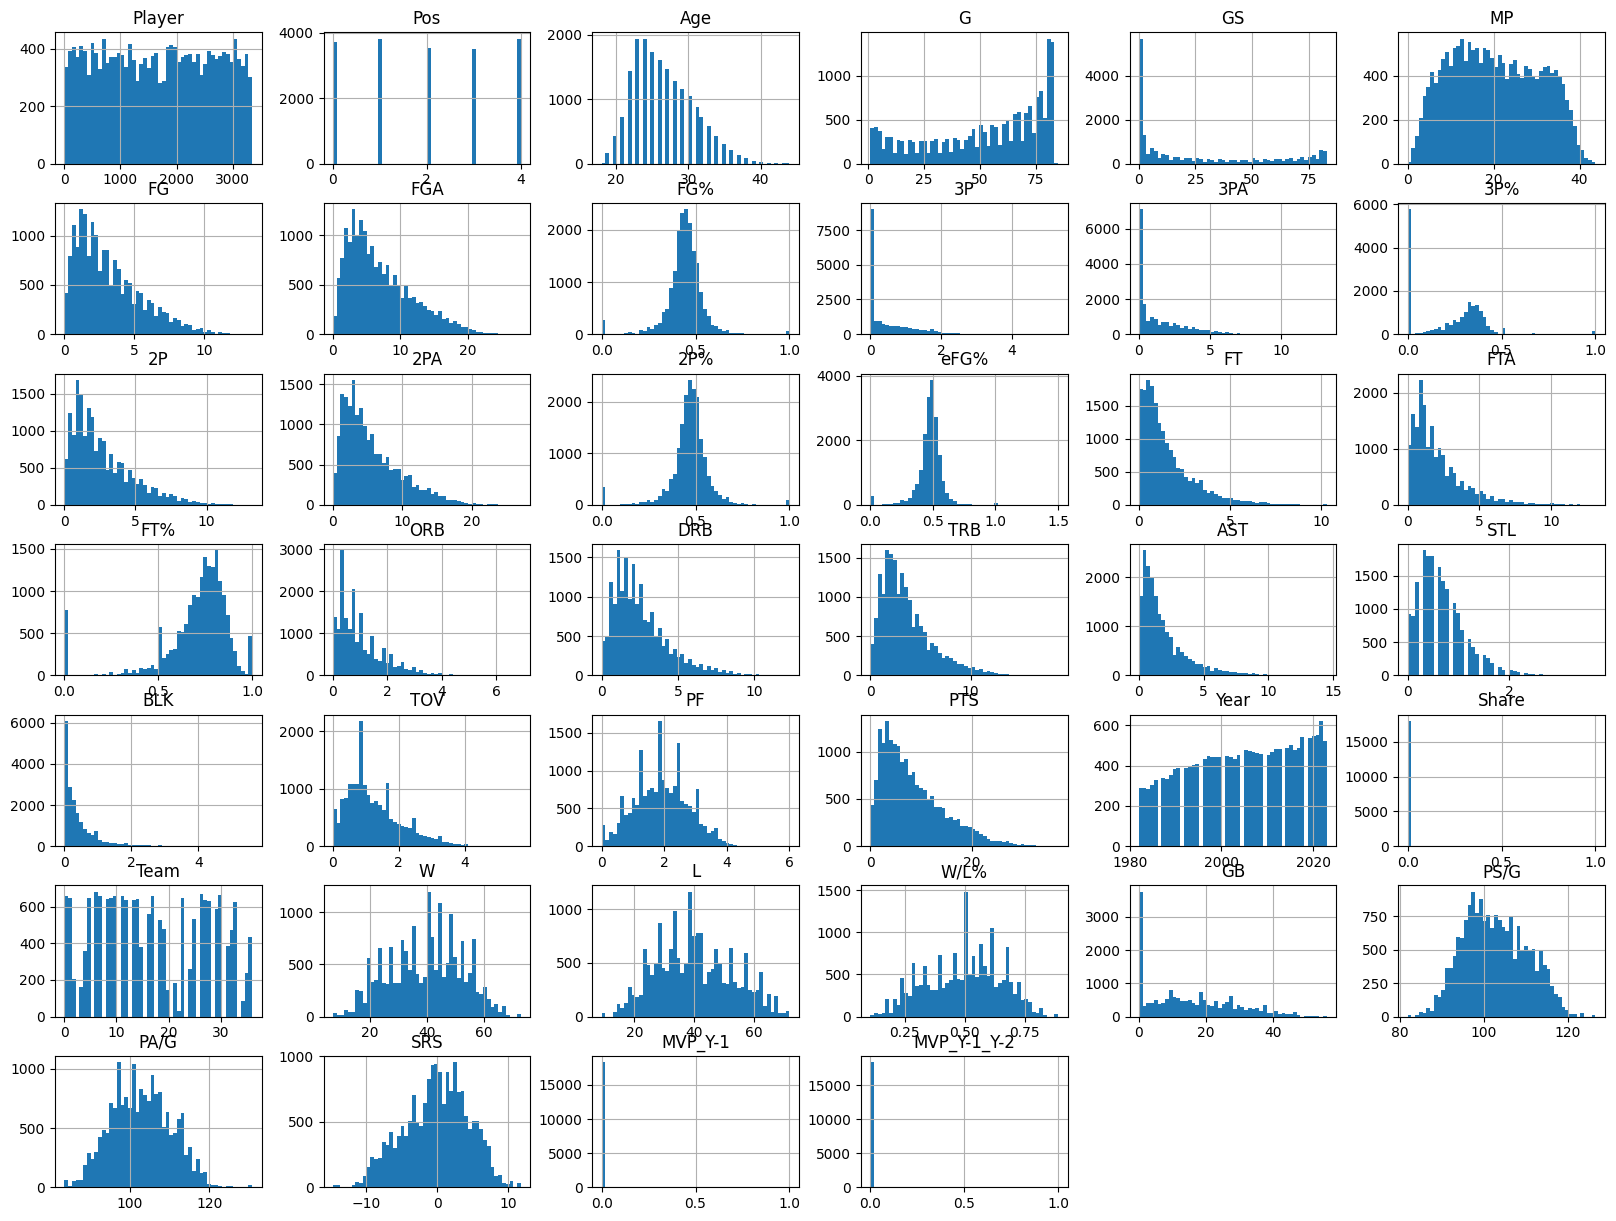

In [112]:
for column in DF.select_dtypes(include=['object']).columns:
    DF[column].value_counts().plot(kind='bar')
    plt.show()

#affiche les histogrammes pour les variables numériques
DF.hist(bins=50, figsize=(20,15))
plt.show()

In [113]:
DF.corr()

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,MVP_Y-1,MVP_Y-1_Y-2
Player,1.000000,0.021293,-0.013197,0.006804,-0.001043,-0.007024,0.001652,0.005872,-0.016381,0.012829,0.012510,0.023062,-0.002241,0.001475,-0.007798,-0.009434,-0.016718,-0.021044,0.019376,-0.022422,-0.029181,-0.028435,0.013513,-0.000762,-0.026887,-0.004164,-0.021881,-0.001334,-0.002414,0.014678,-0.015293,0.010401,-0.005845,0.009119,-0.008646,0.019297,0.012397,0.012230,0.015914,0.015715
Pos,0.021293,1.000000,-0.066502,-0.001978,-0.010771,0.093562,0.093445,0.163566,-0.227422,0.361782,0.382557,0.388452,-0.013967,0.023146,-0.128755,-0.070732,0.044773,-0.009023,0.169702,-0.419189,-0.304146,-0.358465,0.197882,0.225593,-0.415691,0.050664,-0.226019,0.119486,0.023984,-0.005442,-0.002401,-0.003358,0.002404,-0.003141,0.001458,0.021724,0.024529,-0.004424,-0.004588,-0.002844
Age,-0.013197,-0.066502,1.000000,0.055023,0.058168,0.095436,0.025468,0.027403,0.008548,0.057881,0.044042,0.027225,0.009209,0.012486,-0.007798,0.029846,0.016234,-0.002593,0.085876,-0.005897,0.074515,0.051175,0.076481,0.027115,-0.001478,0.010390,0.056175,0.029100,-0.063574,0.018210,-0.005738,0.163655,-0.157930,0.167824,-0.128488,-0.063050,-0.162938,0.160252,0.023797,0.011576
G,0.006804,-0.001978,0.055023,1.000000,0.620061,0.646642,0.546295,0.525837,0.337096,0.220861,0.205131,0.193665,0.524590,0.515734,0.287219,0.335615,0.438731,0.439253,0.388692,0.388115,0.474127,0.469495,0.383432,0.475359,0.294845,0.479542,0.552338,0.533684,-0.170500,0.092412,0.005993,0.127767,-0.036331,0.085165,-0.045990,0.018831,-0.036157,0.087386,0.038839,0.021488
GS,-0.001043,-0.010771,0.058168,0.620061,1.000000,0.828622,0.756362,0.739021,0.257450,0.292773,0.288540,0.137294,0.730819,0.724952,0.213344,0.241787,0.644829,0.648513,0.240234,0.491481,0.658861,0.636262,0.550864,0.616392,0.395698,0.688850,0.597202,0.745777,-0.083594,0.171888,0.002517,0.058643,-0.017504,0.039433,-0.021040,0.001690,-0.023218,0.039770,0.077008,0.042183
MP,-0.007024,0.093562,0.095436,0.646642,0.828622,1.000000,0.892397,0.897682,0.290454,0.448083,0.454780,0.261676,0.829381,0.835679,0.266875,0.316578,0.764023,0.762064,0.387440,0.505842,0.733564,0.694346,0.665802,0.748212,0.388582,0.818607,0.710197,0.891851,-0.040499,0.166071,-0.003848,-0.022121,0.030587,-0.027340,0.031900,-0.024774,-0.007787,-0.027531,0.077402,0.041314
FG,0.001652,0.093445,0.025468,0.546295,0.756362,0.892397,1.000000,0.981764,0.330974,0.416691,0.421047,0.240874,0.956716,0.946960,0.295932,0.329703,0.855654,0.848684,0.352087,0.474264,0.684492,0.648662,0.615562,0.667733,0.361738,0.831614,0.602373,0.989768,-0.059067,0.272148,-0.001927,0.015742,-0.003644,0.009849,-0.003072,0.085240,0.078203,0.010729,0.129632,0.066838
FGA,0.005872,0.163566,0.027403,0.525837,0.739021,0.897682,0.981764,1.000000,0.215746,0.495752,0.511878,0.285215,0.911661,0.928693,0.202860,0.243082,0.842444,0.825157,0.372917,0.395109,0.634786,0.586477,0.648342,0.688898,0.294562,0.836418,0.570227,0.981861,-0.039312,0.246613,-0.005239,-0.016253,0.024830,-0.021417,0.023668,0.045034,0.057869,-0.021120,0.117569,0.057432
FG%,-0.016381,-0.227422,0.008548,0.337096,0.257450,0.290454,0.330974,0.215746,1.000000,-0.054757,-0.098019,0.004348,0.378253,0.290165,0.865666,0.921901,0.245850,0.275824,0.175616,0.395642,0.356502,0.388009,0.087895,0.158838,0.318677,0.220314,0.364149,0.297831,-0.045995,0.066242,0.010607,0.070166,-0.056423,0.065321,-0.055218,0.127737,0.082920,0.071820,0.031451,0.020802
3P,0.012829,0.361782,0.057881,0.220861,0.292773,0.448083,0.416691,0.495752,-0.054757,1.000000,0.984325,0.565538,0.134695,0.145051,0.060578,0.241459,0.272116,0.209809,0.310485,-0.221895,0.142580,0.026882,0.405064,0.354511,-0.122468,0.297110,0.075012,0.482836,0.381288,0.077379,-0.023951,0.012496,-0.057402,0.035180,-0.065547,0.101058,0.077172,0.037286,0.045415,0.029100


In [114]:
DF_corr = DF.corr()
columns = DF.columns
correlated_vars = []
for var1 in columns:
    for var2 in columns:
        if(var1 != var2 and DF_corr[var1][var2]>0.5):
            if([var1,var2] in correlated_vars  or [var2,var1] in correlated_vars):
                pass
            else: 
                correlated_vars.append([var1,var2])


In [115]:
correlated_vars

[['G', 'GS'],
 ['G', 'MP'],
 ['G', 'FG'],
 ['G', 'FGA'],
 ['G', '2P'],
 ['G', '2PA'],
 ['G', 'PF'],
 ['G', 'PTS'],
 ['GS', 'MP'],
 ['GS', 'FG'],
 ['GS', 'FGA'],
 ['GS', '2P'],
 ['GS', '2PA'],
 ['GS', 'FT'],
 ['GS', 'FTA'],
 ['GS', 'DRB'],
 ['GS', 'TRB'],
 ['GS', 'AST'],
 ['GS', 'STL'],
 ['GS', 'TOV'],
 ['GS', 'PF'],
 ['GS', 'PTS'],
 ['MP', 'FG'],
 ['MP', 'FGA'],
 ['MP', '2P'],
 ['MP', '2PA'],
 ['MP', 'FT'],
 ['MP', 'FTA'],
 ['MP', 'ORB'],
 ['MP', 'DRB'],
 ['MP', 'TRB'],
 ['MP', 'AST'],
 ['MP', 'STL'],
 ['MP', 'TOV'],
 ['MP', 'PF'],
 ['MP', 'PTS'],
 ['FG', 'FGA'],
 ['FG', '2P'],
 ['FG', '2PA'],
 ['FG', 'FT'],
 ['FG', 'FTA'],
 ['FG', 'DRB'],
 ['FG', 'TRB'],
 ['FG', 'AST'],
 ['FG', 'STL'],
 ['FG', 'TOV'],
 ['FG', 'PF'],
 ['FG', 'PTS'],
 ['FGA', '3PA'],
 ['FGA', '2P'],
 ['FGA', '2PA'],
 ['FGA', 'FT'],
 ['FGA', 'FTA'],
 ['FGA', 'DRB'],
 ['FGA', 'TRB'],
 ['FGA', 'AST'],
 ['FGA', 'STL'],
 ['FGA', 'TOV'],
 ['FGA', 'PF'],
 ['FGA', 'PTS'],
 ['FG%', '2P%'],
 ['FG%', 'eFG%'],
 ['3P', '3PA'],
 ['3P

In [116]:
corr = DF.corr(method = "pearson")["Share"]
corr

Player         0.014678
Pos           -0.005442
Age            0.018210
G              0.092412
GS             0.171888
MP             0.166071
FG             0.272148
FGA            0.246613
FG%            0.066242
3P             0.077379
3PA            0.077826
3P%            0.027156
2P             0.272239
2PA            0.249852
2P%            0.059735
eFG%           0.058041
FT             0.316554
FTA            0.317283
FT%            0.045038
ORB            0.119499
DRB            0.217255
TRB            0.195168
AST            0.202032
STL            0.183613
BLK            0.147927
TOV            0.232787
PF             0.074203
PTS            0.284985
Year          -0.021137
Share          1.000000
Team          -0.005519
W              0.125192
L             -0.121257
W/L%           0.126680
GB            -0.101218
PS/G           0.039645
PA/G          -0.035739
SRS            0.120920
MVP_Y-1        0.412476
MVP_Y-1_Y-2    0.194286
Name: Share, dtype: float64

In [117]:
abs_corr = abs(corr)
abs_corr.sort_values()

Pos            0.005442
Team           0.005519
Player         0.014678
Age            0.018210
Year           0.021137
3P%            0.027156
PA/G           0.035739
PS/G           0.039645
FT%            0.045038
eFG%           0.058041
2P%            0.059735
FG%            0.066242
PF             0.074203
3P             0.077379
3PA            0.077826
G              0.092412
GB             0.101218
ORB            0.119499
SRS            0.120920
L              0.121257
W              0.125192
W/L%           0.126680
BLK            0.147927
MP             0.166071
GS             0.171888
STL            0.183613
MVP_Y-1_Y-2    0.194286
TRB            0.195168
AST            0.202032
DRB            0.217255
TOV            0.232787
FGA            0.246613
2PA            0.249852
FG             0.272148
2P             0.272239
PTS            0.284985
FT             0.316554
FTA            0.317283
MVP_Y-1        0.412476
Share          1.000000
Name: Share, dtype: float64

Toutes nos variables sont maintenant numériques. Il faut maintenant réfléchir à quel type de modèle serait le plus pertinent dans notre cas.

La variable "Share" étant une variable prenant des valeurs sur tout l'intervalle [0,1], il sera plus judicieux ici de se tourner vers une régression.

In [118]:
years =  sorted(DF["Year"].unique())
years

[1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

L'idée est d'utiliser les résultats des autres années pour prédire une année en particulier

Commençons par l'année 2016

On définit l'ensemble d'apprentissage et de test ainsi que la variable cible.

In [119]:
train = DF[DF["Year"]<2016]
test = DF[DF["Year"]==2016]
x_columns =  train.drop('Share', axis=1).columns
y_column  = 'Share'


Entrainement et utilisation du modèle

In [120]:
reg = LinearRegression().fit(train[x_columns], train[y_column])
Y_pred_MVP_2016 = reg.predict(test[x_columns])

Un peu de mise en forme...

In [121]:
Y_pred_MVP_2016 = pd.DataFrame(Y_pred_MVP_2016,columns = ["Pred_Share_reg"],index = test.index)  #on associe à notre dataframe les index de l'ensemble de test pour pouvoir faire correspondre chaque prédiction au joueur correspondant.
Y_pred_MVP_2016

,Pred_Share_reg
40,0.002485
44,0.012771
59,0.009354
153,-0.009989
211,0.039107
...,...
18178,-0.002411
18231,0.006274
18256,0.021669
18272,0.011013


Relions ces prédictions aux noms des joueurs concernés à l'aide de l'index des lignes

In [122]:
DF_pred = pd.concat([FinalStat["Player"],Y_pred_MVP_2016],axis = 1,join="inner")
DF_pred      

,Player,Pred_Share_reg
40,Aaron Brooks,0.002485
44,Aaron Gordon,0.012771
59,Aaron Harrison,0.009354
153,Adreian Payne,-0.009989
211,Al Horford,0.039107
...,...,...
18178,Xavier Munford,-0.002411
18231,Zach LaVine,0.006274
18256,Zach Randolph,0.021669
18272,Zaza Pachulia,0.011013


Trions ce dataframe pour avoir le classement prédit

In [123]:
DF_pred.sort_values(by=['Pred_Share_reg'],ascending = False, inplace = True)

Maintenant que les lignes sont triées, on peut créer une colonne "Rank_pred" qui correspond à la position du joueur pour le MVP

In [124]:
DF_pred["Rank_pred_reg"] = 0
DF_pred["Rank_pred_reg"] = DF_pred["Pred_Share_reg"].rank(ascending=False, method='min').astype(int)

In [125]:
DF_pred

,Player,Pred_Share_reg,Rank_pred_reg
16102,Stephen Curry,0.534022,1
10135,Kevin Durant,0.140793,2
10961,LeBron James,0.131103,3
7694,James Harden,0.127158,4
15195,Russell Westbrook,0.120512,5
...,...,...,...
852,Anthony Brown,-0.032344,474
3944,Dante Cunningham,-0.032958,475
2081,Briante Weber,-0.035844,476
3584,Dahntay Jones,-0.040697,477


Pour comparer ces résultats aux vrais résultats, on va créer un Dataframe équivalent mais pour les valeurs réelles 

In [126]:
DF_reel = pd.DataFrame(test[y_column])
DF_reel.sort_values(by=['Share'],ascending = False, inplace = True)

In [127]:
DF_reel["Rank_reel"] = 0
DF_reel["Rank_reel"] = DF_reel["Share"].rank(ascending=False, method='min').astype(int)
DF_reel


,Share,Rank_reel
16102,1.000,1
9734,0.484,2
10961,0.482,3
15195,0.371,4
10135,0.112,5
...,...,...
6465,0.000,11
6417,0.000,11
6396,0.000,11
6324,0.000,11


On drop la colonne Share pour éviter le doublon après la jointure avec le DF_pred

In [128]:
DF_reel.drop(columns = ["Share"], inplace = True)

In [129]:
DF_pred = pd.concat([DF_pred,test[y_column]],axis = 1,join="inner")
DF_pred

,Player,Pred_Share_reg,Rank_pred_reg,Share
16102,Stephen Curry,0.534022,1,1.000
10135,Kevin Durant,0.140793,2,0.112
10961,LeBron James,0.131103,3,0.482
7694,James Harden,0.127158,4,0.007
15195,Russell Westbrook,0.120512,5,0.371
...,...,...,...,...
852,Anthony Brown,-0.032344,474,0.000
3944,Dante Cunningham,-0.032958,475,0.000
2081,Briante Weber,-0.035844,476,0.000
3584,Dahntay Jones,-0.040697,477,0.000


Rassemblons tout cela dans un seul dataframe DF_2016

In [130]:
DF_2016 = pd.concat([DF_pred,DF_reel], axis  = 1 )
DF_2016.sort_values(by=['Rank_reel'],ascending = True, inplace = True)
DF_2016.head(13)

,Player,Pred_Share_reg,Rank_pred_reg,Share,Rank_reel
16102,Stephen Curry,0.534022,1,1.000,1
9734,Kawhi Leonard,0.096476,9,0.484,2
10961,LeBron James,0.131103,3,0.482,3
15195,Russell Westbrook,0.120512,5,0.371,4
10135,Kevin Durant,0.140793,2,0.112,5
3019,Chris Paul,0.101342,7,0.082,6
5229,Draymond Green,0.074909,15,0.038,7
3649,Damian Lillard,0.068077,20,0.020,8
7694,James Harden,0.127158,4,0.007,9
10606,Kyle Lowry,0.074014,16,0.005,10


On constate que l'on prédit correctement le MVP de 2016, maintenant il faudrait trouver une métrique pertinente pour évaluer l'écart entre la position réelle du top 3 (ou 5) avec leur position prédite

In [13]:
def error_rank_mvp(df,model):
    #DF : Dataframe contenant au minimum la variable "Share"  ainsi que 
    #le classement réel et le classement prédit "Rank_pred", "Rank_reel"
    #On trie le Dataframe sur le classement réel
    df.sort_values(by=['Rank_reel'],ascending = True, inplace = True)
    #La variable i va contenir la position du dernier convoqué au MVP.
    #De cette manière en parcourant le Dataframe du début jusqu'à la position i, 
    #nous aurons tous les convoqués au MVP
    
    i= 0
    while df["Share"].iloc[i] > 0:
        i +=1
    print("Nombre de convoqués MVP : {}".format(i))
    rmse = (np.abs(df["Rank_reel"][:i]-df["Rank_pred_{}".format(model)][:i]))**2
    rmse = rmse.sum()/i
    rmse = np.sqrt(rmse)
    diff_top1 = np.abs(df["Rank_reel"].iloc[0]-df["Rank_pred_{}".format(model)].iloc[0])
    return(rmse,diff_top1)

    
    

In [135]:
error_rank_mvp(DF_2016,"reg")

Nombre de convoqués MVP : 10


(5.735852159879995, 0)

En plus de cette métrique, implémentons une fonction *pred_to_df* permettant de résumer toutes les étapes dans la création du dataframe final à partir d'une prédiction comme vu dans l'exemple de l'année 2016

In [14]:
def pred_to_df(Y_preds,test,y_column,models):
        
        test["Player"] =  labelencoder1.inverse_transform(test['Player'])
        models_names = list(models.keys())
        
        #Mise sous dataframe des prédictions
        DF_pred = test["Player"]
        for i in range(len(models)):
                
                Y_pred = pd.DataFrame(Y_preds[i],columns = ["Pred_Share_{}".format(models_names[i])],index = test.index)
                
                #Création du dataframe des valeurs prédites avec leurs rangs
                DF_pred = pd.concat([DF_pred,Y_pred],axis = 1,join="inner")
                
                DF_pred.sort_values(by=['Pred_Share_{}'.format(models_names[i])],ascending = False, inplace = True)
                DF_pred["Rank_pred_{}".format(models_names[i])] = 0
                DF_pred["Rank_pred_{}".format(models_names[i])] = DF_pred["Pred_Share_{}".format(models_names[i])].rank(ascending=False, method='min').astype(int)
                
        ##Création du dataframe des valeurs réelles avec leurs rangs
        DF_reel = pd.DataFrame(test[y_column])
        DF_reel.sort_values(by=['Share'],ascending = False, inplace = True)
        DF_reel["Rank_reel"] = 0
        DF_reel["Rank_reel"] = DF_reel["Share"].rank(ascending=False, method='min').astype(int)
        DF_reel.drop(columns = ["Share"], inplace = True)
        #Concaténation
        DF_pred = pd.concat([DF_pred,test[y_column]],axis = 1,join="inner")
        DF_year = pd.concat([DF_pred,DF_reel], axis  = 1 )
        DF_year.sort_values(by=['Rank_reel'],ascending = True, inplace = True)
        return DF_year
    
    

Enfin, créons une fonction qui, à partir des données et d'une liste de modèles choisis, renvoie la valeur calculée par la métrique *error_rank_mvp* pour chaque modèle et chaque prédiction qu'il a effectué.

Cette permettra de se rendre compte de la qualité du modèle

In [15]:
def prediction(DF,models,n = 8,selected_features = DF.drop('Share', axis=1).columns,cv = True,year = None ):
    #DF : Dataframe comportant toutes les données exploitables pour l'apprentissage
    #model : Type du modèle que l'on va entrainer pour la prédiction du MVP
    #cv : Booléen qui vaut True si l'utilisateur veut faire de la validation croisée, 0 sinon
    #year : l'année test choisie en cas de non validation croisée
    #n_splits : nombre d'années testées
    #selected_features : variables choisies pour le modèle
    model_performance = pd.DataFrame(columns=['MeanErrorRank','Diff_Rank_MVP_actual/predict','time to train','time to predict','total time'])
    if cv == True:
        years =  sorted(DF["Year"].unique())[-n:-1]
        x_columns =  selected_features
        y_column  = 'Share'
        global_error = 0
        start = []
        end_train = []
        end_predict = []
        for year in years:
            #Construction ensemble apprentissage/test
            train =  DF[DF["Year"] < year]
            test =   DF[DF["Year"] == year]
            Y_preds_MVP = [] 
            #Entrainement du meilleur modèle
            for model in list(models.values()):
                
                start.append(time.time())
                model.fit(train[x_columns], train[y_column])
                end_train.append(time.time())
            #Prédiction
                Y_preds_MVP.append(model.predict(test[x_columns]))
                end_predict.append(time.time())
            
            #Création du Dataframe comportant le classement réel et le classement prédit
            DF_year = pred_to_df(Y_preds_MVP,test,y_column,models)
            print(DF_year.head(10))
            #Calcul de l'erreur de prédiction
            for i in range(len(models)):
                #Time
                train_time = end_train[i]-start[i]
                predict_time = end_predict[i]-end_train[i]
                total_time = end_predict[i]-start[i]
                model = list(models.keys())[i]
                
                year_error,diff_top1 = error_rank_mvp(DF_year,model)
                
                model_performance.loc['{}({})'.format(model,year)] = [year_error,diff_top1,train_time,predict_time,total_time] 
                print("Année TEST : {}".format(year)+" Modèle : {}".format(model)+" ERROR RANK: {}\n".format(year_error))
                global_error = global_error + year_error

        print("ERREUR GLOBALE MOYENNE pour le Modèle {}: {}".format(model,global_error/n))
        return(models,DF_year,model_performance)
        
    else:
        
        x_columns =  selected_features
        y_column  = 'Share'
        train =  DF[DF["Year"] != year]
        test =   DF[DF["Year"] == year]
        Y_preds_MVP = []
        for model in list(models.values()):
            model.fit(train[x_columns], train[y_column])
            Y_preds_MVP.append(model.predict(test[x_columns]))
        DF_year = pred_to_df(Y_preds_MVP,test,y_column,models)
        year_error = error_rank_mvp(DF_year,list(models.keys())[0])[0]
        print(DF_year.head(10))
        print("Année TEST : {}".format(year)+" ERROR RANK: {}\n".format(year_error))
        return(models,year_error,DF_year,model_performance)
   
   
    
    

### Sélection du modèle

Commencons par tester plusieurs types de modèles en laissant les hyperparamètres par défaut

In [144]:
d = {"reg" : LinearRegression(),"rf" : RandomForestRegressor(),"elastic" : ElasticNet()}
models,DF_year,model_performance = prediction(DF,d)

                  Player  Pred_Share_reg  Rank_pred_reg  Pred_Share_rf  \
16102      Stephen Curry        0.534022              1        0.82396   
9734       Kawhi Leonard        0.096476              9        0.04253   
10961       LeBron James        0.131103              3        0.32077   
15195  Russell Westbrook        0.120512              5        0.16686   
10135       Kevin Durant        0.140793              2        0.39761   
3019          Chris Paul        0.101342              7        0.02692   
5229      Draymond Green        0.074909             15        0.12668   
3649      Damian Lillard        0.068077             20        0.05659   
7694        James Harden        0.127158              4        0.14373   
10606         Kyle Lowry        0.074014             16        0.02208   

       Rank_pred_rf  Pred_Share_elastic  Rank_pred_elastic  Share  Rank_reel  
16102             1            0.006866                 56  1.000          1  
9734             13        

### Visualisation 

In [145]:
model_performance

,MeanErrorRank,Diff_Rank_MVP_actual/predict,time to train,time to predict,total time
reg(2016),5.735852,0.0,0.057249,0.002518,0.059767
rf(2016),5.458938,0.0,29.612573,0.011862,29.624435
elastic(2016),256.878571,55.0,0.018321,0.002106,0.020427
reg(2017),4.512609,1.0,0.057249,0.002518,0.059767
rf(2017),4.786344,4.0,29.612573,0.011862,29.624435
elastic(2017),274.157884,84.0,0.018321,0.002106,0.020427
reg(2018),6.019200,1.0,0.057249,0.002518,0.059767
rf(2018),6.731099,0.0,29.612573,0.011862,29.624435
elastic(2018),304.268606,323.0,0.018321,0.002106,0.020427
reg(2019),4.795832,1.0,0.057249,0.002518,0.059767


In [152]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'MeanErrorRank': '{:.1f}',
                                                                     'Diff_Rank_MVP_actual/predict': '{:.1f}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,MeanErrorRank,Diff_Rank_MVP_actual/predict,time to train,time to predict,total time
reg(2016),5.7,0.0,0.1,0.0,0.1
rf(2016),5.5,0.0,29.6,0.0,29.6
elastic(2016),256.9,55.0,0.0,0.0,0.0
reg(2017),4.5,1.0,0.1,0.0,0.1
rf(2017),4.8,4.0,29.6,0.0,29.6
elastic(2017),274.2,84.0,0.0,0.0,0.0
reg(2018),6.0,1.0,0.1,0.0,0.1
rf(2018),6.7,0.0,29.6,0.0,29.6
elastic(2018),304.3,323.0,0.0,0.0,0.0
reg(2019),4.8,1.0,0.1,0.0,0.1


On voit clairement que dans tous les cas le Random Forest est bien plus précis que les autres modèles. ( plus si sûr du coup )

REMARQUE : Cette conclusion se fait uniquement sur les hyperparamètres par défaut, il faudrait dans l'idéal effectué un gridsearch pour chaque modèle pour avoir les meilleurs résultats possibles

In [15]:
def best_param(model,para_grids,year):
    train = DF[DF["Year"] < year]
    test = DF[DF["Year"] ==year ]
    x_columns =  train.drop('Share', axis=1).columns
    y_column  = 'Share'
    reg = model.fit(train[x_columns], train[y_column])
    grid = GridSearchCV(reg, para_grids)
    grid.fit(train[x_columns],train[y_column])
    reg_grid = grid.best_estimator_
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')
    print(grid.best_score_, grid.best_params_)
    bestpm = grid.best_params_
    
    return bestpm
    

In [22]:
para_grids_elasticNET = {
    'l1_ratio' : [0, 0.25, 0.5, 0.75, 1], #la part accordée à la pénalité L1 par rapport à la pénalité L2
    'alpha' : [0,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1], #contrôle le poids des pénalités dans l'entraînement du modèle
    'max_iter' : [100, 500, 1000, 1500]
}

In [20]:
para_grids_randomForest = {
    "random_state" : [42],
    "n_estimators" : [10,50,100,200,500],
    "max_features" : ["auto","log2","sqrt"],
    'max_depth': [5,10,20,30],
    }

In [23]:
#À faire tourner mais horriblement long

en = ElasticNet()
bp_en = best_param(en,para_grids_elasticNET,2022)

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
0.22736268465810255 {'alpha': 0, 'l1_ratio': 0, 'max_iter': 100}


L'ElasticNet semble favoriser une configuration équivalente à la régression linéaire, elle écarte donc les modèles suivants :
ElasticNet
Regression Lasso
Regression Ridge

In [21]:
rf = RandomForestRegressor()
bp_rf = best_param(rf,para_grids_randomForest,2022)

-----------------------------------------------------
-----------------------------------------------------
-----------------------------------------------------
0.5373322383795559 {'max_depth': 30, 'max_features': 'log2', 'n_estimators': 500, 'random_state': 42}


- On voit que le modèle est limité par les hyperparamètres qu'on lui a fourni.
- On peut donc en déduire qu'une profondeur de 30 n'est surement pas assez donc on va laisser ce paramètre sans limite
- Pour le n_estimators <=> le nombre d'arbre de décision dans la forêt, il ne semble pas avoir atteint sa limite ce qui veut dire que l'on va devoir se limiter à 500 pour avoir un temps d'éxécution raisonnable pour la suite


In [28]:
d = {"reg" : LinearRegression(),"rf" : RandomForestRegressor(max_features = 'log2', n_estimators = 500)}
models,DF_year,model_performance = prediction(DF,d)

                  Player  Pred_Share_reg  Rank_pred_reg  Pred_Share_rf  \
16102      Stephen Curry        0.534022              1       0.690002   
9734       Kawhi Leonard        0.096476              9       0.087818   
10961       LeBron James        0.131103              3       0.291746   
15195  Russell Westbrook        0.120512              5       0.170426   
10135       Kevin Durant        0.140793              2       0.401474   
3019          Chris Paul        0.101342              7       0.034654   
5229      Draymond Green        0.074909             15       0.102718   
3649      Damian Lillard        0.068077             20       0.040616   
7694        James Harden        0.127158              4       0.176246   
10606         Kyle Lowry        0.074014             16       0.057472   

       Rank_pred_rf  Share  Rank_reel  
16102             1  1.000          1  
9734             10  0.484          2  
10961             3  0.482          3  
15195             5  0.37

In [29]:
model_performance

,MeanErrorRank,Diff_Rank_MVP_actual/predict,time to train,time to predict,total time
reg(2016),5.735852,0.0,0.053468,0.002411,0.055879
rf(2016),5.019960,0.0,17.533759,0.056650,17.590409
reg(2017),4.512609,1.0,0.053468,0.002411,0.055879
rf(2017),5.317210,4.0,17.533759,0.056650,17.590409
reg(2018),6.019200,1.0,0.053468,0.002411,0.055879
rf(2018),5.129102,0.0,17.533759,0.056650,17.590409
reg(2019),4.795832,1.0,0.053468,0.002411,0.055879
rf(2019),8.311638,1.0,17.533759,0.056650,17.590409
reg(2020),10.202124,0.0,0.053468,0.002411,0.055879
rf(2020),13.297870,0.0,17.533759,0.056650,17.590409


In [30]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'MeanErrorRank': '{:.1f}',
                                                                     'Diff_Rank_MVP_actual/predict': '{:.1f}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,MeanErrorRank,Diff_Rank_MVP_actual/predict,time to train,time to predict,total time
reg(2016),5.7,0.0,0.1,0.0,0.1
rf(2016),5.0,0.0,17.5,0.1,17.6
reg(2017),4.5,1.0,0.1,0.0,0.1
rf(2017),5.3,4.0,17.5,0.1,17.6
reg(2018),6.0,1.0,0.1,0.0,0.1
rf(2018),5.1,0.0,17.5,0.1,17.6
reg(2019),4.8,1.0,0.1,0.0,0.1
rf(2019),8.3,1.0,17.5,0.1,17.6
reg(2020),10.2,0.0,0.1,0.0,0.1
rf(2020),13.3,0.0,17.5,0.1,17.6


In [33]:

x_columns =  DF.drop('Share', axis=1).columns
Fi = pd.DataFrame({'Variable' : x_columns,'Fi':models["rf"].feature_importances_})
Fi.sort_values(['Fi'],ascending = False,inplace = True)
Fi

,Variable,Fi
27,PTS,0.092822
6,FG,0.073576
32,W/L%,0.056459
31,L,0.053270
30,W,0.051802
36,SRS,0.051496
17,FTA,0.047395
16,FT,0.047265
12,2P,0.040512
37,MVP_Y-1,0.035364


Les 2 modèles semblent équivalent en ce qui concerne la prédiction de la première place

### Sélection de variables

In [18]:
d = {"rf" : RandomForestRegressor(max_features = 'log2', n_estimators = 500)}
output = prediction(DF,d,cv="False",year = 2022)


Nombre de convoqués MVP : 12
                      Player  Pred_Share_rf  Rank_pred_rf  Share  Rank_reel
13277           Nikola Jokić       0.364286             1  0.875          1
8863             Joel Embiid       0.274330             2  0.706          2
6473   Giannis Antetokounmpo       0.233396             4  0.595          3
4830            Devin Booker       0.270792             3  0.216          4
11290            Luka Dončić       0.182258             6  0.146          5
8189            Jayson Tatum       0.121508             7  0.043          6
7331               Ja Morant       0.224788             5  0.010          7
16121          Stephen Curry       0.101508             9  0.004          8
3025              Chris Paul       0.052572            14  0.002          9
10974           LeBron James       0.117230             8  0.001         10
Année TEST : 2022 ERROR RANK: 1.8708286933869707



In [35]:
fi_rf = list(output[0].values())[0].feature_importances_
print(fi_rf)


[0.00984701 0.0039352  0.00817678 0.01327346 0.01455603 0.02027581
 0.06417758 0.03674583 0.01423222 0.0116622  0.01222198 0.00868731
 0.03801409 0.02718845 0.01392897 0.01583617 0.04398303 0.04859603
 0.01280314 0.01040525 0.02449592 0.01884022 0.03544691 0.02026873
 0.01305709 0.02332783 0.0113302  0.08585797 0.00978993 0.00728717
 0.05071836 0.05548809 0.05944089 0.02863328 0.01139716 0.02298704
 0.05124701 0.0371543  0.00468535]


In [36]:
x_columns =  DF.drop('Share', axis=1).columns
FI = pd.DataFrame({'Variable' : x_columns,'Fi':fi_rf})
FI.sort_values(['Fi'],ascending = False,inplace = True)
FI


,Variable,Fi
27,PTS,0.085858
6,FG,0.064178
32,W/L%,0.059441
31,L,0.055488
36,SRS,0.051247
30,W,0.050718
17,FTA,0.048596
16,FT,0.043983
12,2P,0.038014
37,MVP_Y-1,0.037154


Fin de la partie propre 

In [37]:
selected_features = FI["Variable"].iloc[:20]
d2 = {"rf" : RandomForestRegressor(max_features = 'log2', n_estimators = 500)}
output2 = prediction(DF,d2,selected_features=selected_features,cv="False",year = 2022)

Nombre de convoqués MVP : 12
                      Player  Pred_Share_rf  Rank_pred_rf  Share  Rank_reel
13266           Nikola Jokić       0.326950             2  0.875          1
8858             Joel Embiid       0.277056             4  0.706          2
6471   Giannis Antetokounmpo       0.220072             6  0.595          3
4830            Devin Booker       0.385118             1  0.216          4
11282            Luka Dončić       0.229468             5  0.146          5
8185            Jayson Tatum       0.106246             8  0.043          6
7329               Ja Morant       0.278160             3  0.010          7
16108          Stephen Curry       0.077018            10  0.004          8
3025              Chris Paul       0.076054            11  0.002          9
10140           Kevin Durant       0.106248             7  0.001         10
Année TEST : 2022 ERROR RANK: 2.7233557730613653



On constate que l'erreur est plus importante qu'avec toutes les variables et le MVP n'est plus prédit correctement ce qui veut dire que l'on retiré une variable importante qui attenuait le score de Devin Booker

In [38]:
selected_features2 = FI["Variable"].iloc[:25]
d3 = {"rf" : RandomForestRegressor(max_features = 'log2', n_estimators = 500)}
output3 = prediction(DF,d3,selected_features=selected_features2,cv="False",year = 2022)

Nombre de convoqués MVP : 12
                      Player  Pred_Share_rf  Rank_pred_rf  Share  Rank_reel
13266           Nikola Jokić       0.375510             1  0.875          1
8858             Joel Embiid       0.249934             4  0.706          2
6471   Giannis Antetokounmpo       0.269854             3  0.595          3
4830            Devin Booker       0.374456             2  0.216          4
11282            Luka Dončić       0.204872             6  0.146          5
8185            Jayson Tatum       0.122276             7  0.043          6
7329               Ja Morant       0.205950             5  0.010          7
16108          Stephen Curry       0.067544            12  0.004          8
3025              Chris Paul       0.051424            15  0.002          9
10140           Kevin Durant       0.084218             9  0.001         10
Année TEST : 2022 ERROR RANK: 2.516611478423583



Le nombre de point par match marqué par le joueur semble être une des variables les plus déterminantes dans l'attribution du MVP

In [39]:

X = DF.drop('Share', axis=1)
y = DF['Share']

# Sélection des 5 variables les plus importantes avec la méthode f_regression
selector = SelectKBest(score_func=f_regression, k=20)
X_new = selector.fit_transform(X, y)
# Obtention des noms des variables sélectionnées
mask = selector.get_support() # masque des variables sélectionnées
selected_features3 = X.columns[mask] # noms des variables sélectionnées

# Affichage des noms des variables sélectionnées
print("Variables sélectionnées : ", selected_features3)

Variables sélectionnées :  Index(['GS', 'MP', 'FG', 'FGA', '2P', '2PA', 'FT', 'FTA', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PTS', 'W', 'L', 'W/L%', 'MVP_Y-1', 'MVP_Y-1_Y-2'],
      dtype='object')


In [40]:
d4 = {"rf" : RandomForestRegressor(max_features = 'log2', n_estimators = 500)}
output3 = prediction(DF,d3,selected_features=selected_features3,cv="False",year = 2022)

Nombre de convoqués MVP : 12
                      Player  Pred_Share_rf  Rank_pred_rf  Share  Rank_reel
13266           Nikola Jokić       0.359446             1  0.875          1
8858             Joel Embiid       0.269690             3  0.706          2
6471   Giannis Antetokounmpo       0.260738             5  0.595          3
4830            Devin Booker       0.355978             2  0.216          4
11282            Luka Dončić       0.243950             6  0.146          5
8185            Jayson Tatum       0.071964            12  0.043          6
7329               Ja Morant       0.262990             4  0.010          7
16108          Stephen Curry       0.075356            11  0.004          8
3025              Chris Paul       0.068924            13  0.002          9
4379           DeMar DeRozan       0.065914            14  0.001         10
Année TEST : 2022 ERROR RANK: 2.972092416687835



L'erreur est vraisemblablement la même, on peut quand même remarquer que Nikola Jokic est un peu mieux classé avec ces variables

Essayons de prédire l'année 2023 avec ces variables


In [42]:
d5 = {"rf" : RandomForestRegressor(max_features = 'log2', n_estimators = 500)}
output5 = prediction(DF,d5,selected_features=selected_features3,cv="False",year = 2023)

Nombre de convoqués MVP : 0
                        Player  Pred_Share_rf  Rank_pred_rf  Share  Rank_reel
6472     Giannis Antetokounmpo       0.583166             1    0.0          1
3976            Darius Garland       0.012854            31    0.0          1
8859               Joel Embiid       0.524588             2    0.0          1
13267             Nikola Jokić       0.414902             3    0.0          1
8186              Jayson Tatum       0.410392             4    0.0          1
11283              Luka Dončić       0.277694             5    0.0          1
15703  Shai Gilgeous-Alexander       0.201302             6    0.0          1
10141             Kevin Durant       0.171400             7    0.0          1
8168              Jaylen Brown       0.171014             8    0.0          1
7330                 Ja Morant       0.154446             9    0.0          1
Année TEST : 2023 ERROR RANK: nan



In [43]:
output5[2].sort_values(["Pred_Share_rf"],ascending=False).head(10)

,Player,Pred_Share_rf,Rank_pred_rf,Share,Rank_reel
6472,Giannis Antetokounmpo,0.583166,1,0.0,1
8859,Joel Embiid,0.524588,2,0.0,1
13267,Nikola Jokić,0.414902,3,0.0,1
8186,Jayson Tatum,0.410392,4,0.0,1
11283,Luka Dončić,0.277694,5,0.0,1
15703,Shai Gilgeous-Alexander,0.201302,6,0.0,1
10141,Kevin Durant,0.171400,7,0.0,1
8168,Jaylen Brown,0.171014,8,0.0,1
7330,Ja Morant,0.154446,9,0.0,1
16109,Stephen Curry,0.151262,10,0.0,1


On remarque que Giannis est grand favoris mais d'après les prédictions à ce jour (7 avril 2023 ), embiid semble plus apte à obtenir le MVP. Après discussion avec des personnes connaissant la NBA, il semblerait que Giannis soit un peu délaissé des médias car il a déjà obtenu plusieurs fois le titre de MVP.

Les variables que nous avons rajouté avaient pour but d'atténuer ce phénomène malheuresement elles ne prennent pas en compte les MVP gagnés avant les 2 années précédentes

In [46]:
selected_features4 = selected_features3.drop(["MVP_Y-1","MVP_Y-1_Y-2"])
d6 = {"rf" : RandomForestRegressor(max_features = 'log2', n_estimators = 500)}
output6 = prediction(DF,d6,selected_features=selected_features4,cv="False",year = 2023)

Nombre de convoqués MVP : 0
                        Player  Pred_Share_rf  Rank_pred_rf  Share  Rank_reel
6472     Giannis Antetokounmpo       0.639142             1    0.0          1
3976            Darius Garland       0.012834            31    0.0          1
8859               Joel Embiid       0.501930             2    0.0          1
8186              Jayson Tatum       0.411742             3    0.0          1
13267             Nikola Jokić       0.308042             4    0.0          1
11283              Luka Dončić       0.287748             5    0.0          1
15703  Shai Gilgeous-Alexander       0.203394             6    0.0          1
16109            Stephen Curry       0.179446             7    0.0          1
8168              Jaylen Brown       0.172698             8    0.0          1
10141             Kevin Durant       0.171130             9    0.0          1
Année TEST : 2023 ERROR RANK: nan



In [47]:
output6[2].sort_values(["Pred_Share_rf"],ascending=False).head(10)

,Player,Pred_Share_rf,Rank_pred_rf,Share,Rank_reel
6472,Giannis Antetokounmpo,0.639142,1,0.0,1
8859,Joel Embiid,0.501930,2,0.0,1
8186,Jayson Tatum,0.411742,3,0.0,1
13267,Nikola Jokić,0.308042,4,0.0,1
11283,Luka Dončić,0.287748,5,0.0,1
15703,Shai Gilgeous-Alexander,0.203394,6,0.0,1
16109,Stephen Curry,0.179446,7,0.0,1
8168,Jaylen Brown,0.172698,8,0.0,1
10141,Kevin Durant,0.171130,9,0.0,1
7330,Ja Morant,0.156534,10,0.0,1


On observe ici que sans la prise en compte des MVPS des années précédentes le modèle valorise beaucoup moins Jokic

## H2O

In [175]:
h2o.init()

HF = h2o.H2OFrame(DF)
train =  HF[HF["Year"]<2022]
test = HF[HF["Year"]==2022]
x = HF.columns
y = "Share"
x.remove(y)
aml_2022 = H2OAutoML(max_models=20, seed=1,max_runtime_secs = 500)
aml_2022.train(x=x, y=y, training_frame=train)
lb = aml_2022.leaderboard
lb.head(rows=lb.nrows)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.251-b08, mixed mode)
  Starting server from H:\Desktop\ING3\PFE NBA MVP PREDICTION\PFE\.venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\CYTECH~1\AppData\Local\Temp\tmpz141klgs
  JVM stdout: C:\Users\CYTECH~1\AppData\Local\Temp\tmpz141klgs\h2o_CYTech_Student_started_from_python.out
  JVM stderr: C:\Users\CYTECH~1\AppData\Local\Temp\tmpz141klgs\h2o_CYTech_Student_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,"21 days, 3 hours and 42 minutes"
H2O_cluster_name:,H2O_from_python_CYTech_Student_73xokh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.698 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
18:59:35.786: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_4_AutoML_1_20230330_185935,0.0334791,0.00112085,0.00483873,0.0252076,0.00112085
GBM_grid_1_AutoML_1_20230330_185935_model_1,0.0336404,0.00113168,0.00571087,0.0255432,0.00113168
GBM_3_AutoML_1_20230330_185935,0.0338916,0.00114864,0.00484578,0.02563,0.00114864
GBM_2_AutoML_1_20230330_185935,0.0339416,0.00115203,0.00494599,0.0255902,0.00115203
GBM_5_AutoML_1_20230330_185935,0.0340658,0.00116048,0.00473956,0.0256496,0.00116048
GBM_grid_1_AutoML_1_20230330_185935_model_5,0.0345772,0.00119558,0.00512858,0.0260787,0.00119558
XRT_1_AutoML_1_20230330_185935,0.0348983,0.00121789,0.00754619,0.0262924,0.00121789
GBM_grid_1_AutoML_1_20230330_185935_model_2,0.034935,0.00122045,0.00486889,0.0261172,0.00122045
DRF_1_AutoML_1_20230330_185935,0.035194,0.00123862,0.00482515,0.0262007,0.00123862
GBM_grid_1_AutoML_1_20230330_185935_model_4,0.0352424,0.00124203,0.00622182,0.0268411,0.00124203


In [219]:
preds_2022 = aml_2022.predict(test)
d = {"aml":aml_2022}
test["Pred_Share_aml"] = preds_2022
DF_PRED_H2O_2022 = pred_to_df([test["Pred_Share_aml"].as_data_frame()],test.as_data_frame(),"Share",d)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
ok


In [220]:
DF_PRED_H2O_2022 

,Player,Pred_Share_aml,Rank_pred_aml,Share,Rank_reel
460,Nikola Jokić,0.519325,2,0.875,1
301,Joel Embiid,0.501097,3,0.706,2
211,Giannis Antetokounmpo,0.435079,4,0.595,3
152,Devin Booker,0.677478,1,0.216,4
392,Luka Dončić,0.231710,7,0.146,5
...,...,...,...,...,...
554,Thanasis Antetokounmpo,-0.000095,86,0.000,13
555,Theo Pinson,-0.000095,86,0.000,13
556,Thomas Bryant,-0.000095,86,0.000,13
549,Terence Davis,-0.000095,86,0.000,13


In [221]:
h2o.init()

HF = h2o.H2OFrame(DF)
train =  HF[HF["Year"]<2023]
test = HF[HF["Year"]==2023]
x = HF.columns
y = "Share"
x.remove(y)
aml_2023 = H2OAutoML(max_models=20, seed=1,max_runtime_secs = 500)
aml_2023.train(x=x, y=y, training_frame=train)
lb = aml_2023.leaderboard
lb.head(rows=lb.nrows)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 20 mins
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,"21 days, 5 hours and 2 minutes"
H2O_cluster_name:,H2O_from_python_CYTech_Student_73xokh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.431 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
20:20:29.204: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_4_AutoML_2_20230330_202029,0.0331477,0.00109877,0.00482507,0.0251331,0.00109877
GBM_3_AutoML_2_20230330_202029,0.0332517,0.00110568,0.00482173,0.0252688,0.00110568
GBM_grid_1_AutoML_2_20230330_202029_model_1,0.0335768,0.0011274,0.00575242,0.0256277,0.0011274
GBM_2_AutoML_2_20230330_202029,0.0335936,0.00112853,0.00485084,0.0254954,0.00112853
GBM_grid_1_AutoML_2_20230330_202029_model_2,0.0337279,0.00113757,0.00479003,0.0254151,0.00113757
GBM_grid_1_AutoML_2_20230330_202029_model_5,0.0342558,0.00117346,0.00512569,0.0260447,0.00117346
XRT_1_AutoML_2_20230330_202029,0.0342993,0.00117644,0.00706754,0.0259414,0.00117644
GBM_5_AutoML_2_20230330_202029,0.0344614,0.00118759,0.00480218,0.026023,0.00118759
DRF_1_AutoML_2_20230330_202029,0.0345246,0.00119195,0.00486965,0.0256752,0.00119195
GBM_grid_1_AutoML_2_20230330_202029_model_3,0.0345709,0.00119515,0.00559963,0.02626,0.00119515


In [224]:
preds_2023 = aml_2023.predict(test)
test["Pred_Share_aml"] = preds_2023
DF_PRED_H2O_2023 = pred_to_df([test["Pred_Share_aml"].as_data_frame()],test.as_data_frame(),"Share",d)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
ok


In [226]:
DF_PRED_H2O_2023.sort_values(["Pred_Share_aml"],ascending=False).head(10)

,Player,Pred_Share_aml,Rank_pred_aml,Share,Rank_reel
163,Giannis Antetokounmpo,0.735215,1,0,1
245,Joel Embiid,0.610879,2,0,1
232,Jayson Tatum,0.448644,3,0,1
389,Nikola Jokić,0.423188,4,0,1
334,Luka Dončić,0.400201,5,0,1
452,Shai Gilgeous-Alexander,0.369061,6,0,1
303,Kevin Durant,0.252830,7,0,1
458,Stephen Curry,0.193528,8,0,1
89,Damian Lillard,0.171300,9,0,1
304,Kevin Durant,0.164648,10,0,1
